# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=a2721f06d7039bd8e914114740aafff30b28db413a51f46eacfad01d893be1f5
  Stored in directory: c:\users\gabriel\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(42) # Added seed to ensure repeatable results. Will take away in final product
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
Name = []
Date = []
Clouds = []
Country = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

record_count = 1
print_log = ""
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        print_log = print_log + f"Processing Record {record_count} | {city}\n"
        record_count += 1
        Name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Date.append(response['dt'])
        Clouds.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Humidity.append(response['main']['humidity'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
    except:
        print_log = print_log + "City not found. Skipping...\n"
        
print(print_log)
weather_df = pd.DataFrame({
    "City": Name,
    "Cloudiness": Clouds,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
})

Processing Record 1 | henties bay
Processing Record 2 | illoqqortoormiut
City not found. Skipping...Processing Record 3 | bethel
Processing Record 4 | saint-francois
Processing Record 5 | ushuaia
Processing Record 6 | mar del plata
Processing Record 7 | kruisfontein
Processing Record 8 | bronnoysund
Processing Record 9 | tawkar
City not found. Skipping...Processing Record 10 | yumen
Processing Record 11 | albany
Processing Record 12 | dikson
Processing Record 13 | ossora
Processing Record 14 | vaini
Processing Record 15 | castro
Processing Record 16 | taolanaro
City not found. Skipping...Processing Record 17 | vanimo
Processing Record 18 | san cristobal
Processing Record 19 | ulladulla
Processing Record 20 | ewa beach
Processing Record 21 | bluff
Processing Record 22 | maldonado
Processing Record 23 | mataura
Processing Record 24 | jamestown
Processing Record 25 | geraldton
Processing Record 26 | punta arenas
Processing Record 27 | mitu
Processing Record 28 | da nang
Processing Record 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Henties Bay,0,NA,1585689020,90,-22.12,14.28,15.00,0.89
1,Bethel,90,US,1585688890,61,41.37,-73.41,9.44,1.50
2,Saint-François,0,FR,1585689096,51,46.42,3.91,3.00,2.10
3,Ushuaia,40,AR,1585689028,66,-54.80,-68.30,10.00,5.10
4,Mar del Plata,40,AR,1585688808,55,-38.00,-57.56,18.89,7.20
...,...,...,...,...,...,...,...,...,...
539,Vredendal,0,ZA,1585689256,72,-31.67,18.50,14.55,1.78
540,Kushima,90,JP,1585689256,93,31.46,131.23,15.00,2.10
541,Eirunepé,85,BR,1585689020,79,-6.66,-69.87,27.80,0.20
542,Tocopilla,23,CL,1585689061,36,-22.09,-70.20,27.76,5.25


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_df.to_csv('../output_data/my_cities.csv', index=True, index_label = "City ID")
weather_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [18]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Henties Bay,0,NA,1585689020,90,-22.12,14.28,15.00,0.89
1,Bethel,90,US,1585688890,61,41.37,-73.41,9.44,1.50
2,Saint-François,0,FR,1585689096,51,46.42,3.91,3.00,2.10
3,Ushuaia,40,AR,1585689028,66,-54.80,-68.30,10.00,5.10
4,Mar del Plata,40,AR,1585688808,55,-38.00,-57.56,18.89,7.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

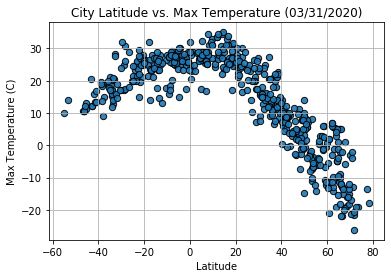

In [99]:
saveloc = "../output_data/temp_lat.png"
today = datetime.datetime.today()
weather_df.plot('Lat', 'Max Temp', kind = 'scatter',
                title = f"City Latitude vs. Max Temperature ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig(saveloc)
plt.show()

#### Latitude vs. Humidity Plot

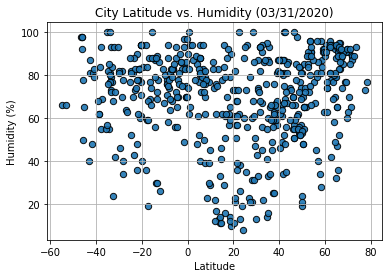

In [100]:
saveloc = "../output_data/hum_lat.png"
weather_df.plot('Lat', 'Humidity', kind = 'scatter',
                title = f"City Latitude vs. Humidity ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(saveloc)
plt.show()

#### Latitude vs. Cloudiness Plot

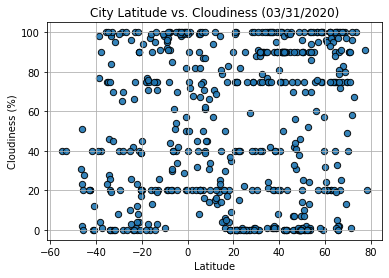

In [101]:
saveloc = "../output_data/cloud_lat.png"
weather_df.plot('Lat', 'Cloudiness', kind = 'scatter',
                title = f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(saveloc)
plt.show()

#### Latitude vs. Wind Speed Plot

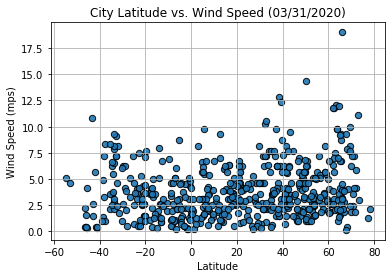

In [102]:
saveloc = "../output_data/wind_lat.png"
weather_df.plot('Lat', 'Wind Speed', kind = 'scatter',
                title = f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.savefig(saveloc)
plt.show()

## Linear Regression

In [103]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_scat(x, y, labels, anotate):
    # Program to plot a scatter plot of the given data and a linear regression
    # x is a list of x axis values
    # y is a list of y axis values
    # labels is a list of labels of the chart: [0] = title, [1] = x axis, [2] = y axis, [3] = save location and file name
    # anotate is a point to place the line label
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig = plt.figure()
    plt.scatter(x, y, s = 40, edgecolors = 'k', alpha = .9)
    plt.title(labels[0])
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,anotate,fontsize=15,color="red")
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    fig.savefig(labels[3])
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [104]:
# Create Northern and Southern Hemisphere DataFrames
weather_n_df = weather_df.loc[weather_df['Lat'] >= 0,:]
weather_s_df = weather_df.loc[weather_df['Lat'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8292574757555858


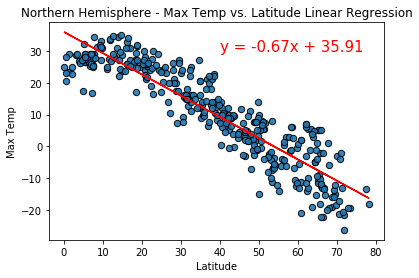

In [105]:
x_axis = weather_n_df['Lat']
y_axis = weather_n_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
saveloc = "../output_data/north_temp_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (40,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46953277476380034


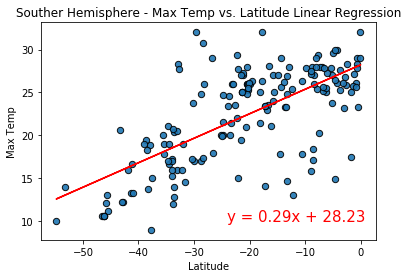

In [106]:
x_axis = weather_s_df['Lat']
y_axis = weather_s_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
title = "Souther Hemisphere - Max Temp vs. Latitude Linear Regression"
saveloc = "../output_data/south_temp_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (-24,10))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0743766526692858


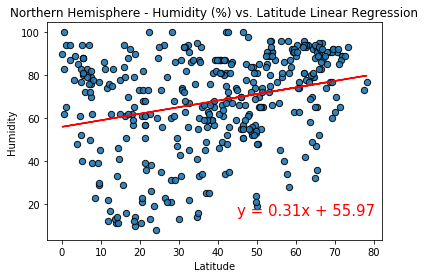

In [107]:
x_axis = weather_n_df['Lat']
y_axis = weather_n_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
saveloc = "../output_data/north_hum_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (45,15))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004825258625587723


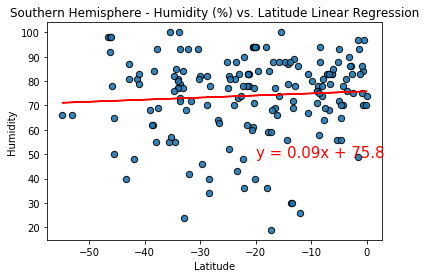

In [108]:
x_axis = weather_s_df['Lat']
y_axis = weather_s_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
saveloc = "../output_data/south_hum_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (-20,49))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019187590761431696


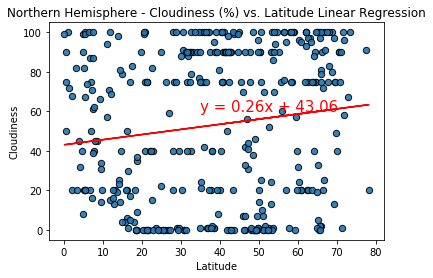

In [109]:
x_axis = weather_n_df['Lat']
y_axis = weather_n_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
saveloc = "../output_data/north_cloud_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (35,60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09614207858884684


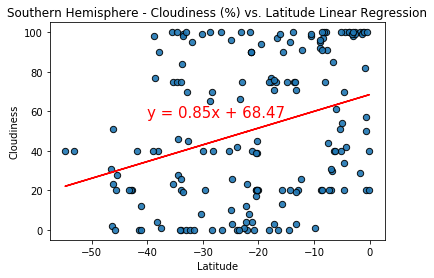

In [83]:
x_axis = weather_s_df['Lat']
y_axis = weather_s_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
saveloc = "../output_data/south_cloud_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (-40,57))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03975557450355003


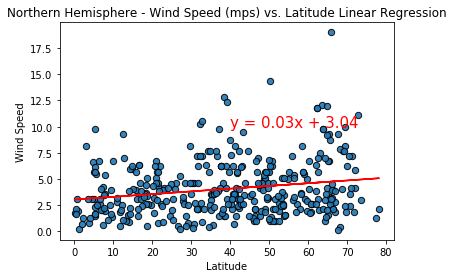

In [84]:
x_axis = weather_n_df['Lat']
y_axis = weather_n_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = "Northern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression"
saveloc = "../output_data/north_wind_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (40,10))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.041865173094345946


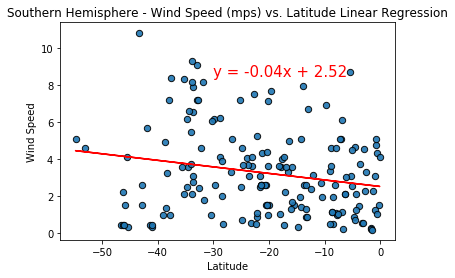

In [85]:
x_axis = weather_s_df['Lat']
y_axis = weather_s_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = "Southern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression"
saveloc = "../output_data/south_wind_lat_lin.png"
labels = [title, xlabel, ylabel, saveloc]
lin_reg_scat(x_axis, y_axis, labels, (-30,8.5))